1. Importación de Librerías y Carga de Datos

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configuración mejorada de visualización
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

# Cargar datos procesados
df = pd.read_csv('data/processed/diabetes_processed.csv')
print(f"Dataset cargado: {df.shape[0]:,} registros, {df.shape[1]} variables")
print("\nPrimeras filas:")
df.head()

Dataset cargado: 86,936 registros, 10 variables

Primeras filas:


,Edad_cat,Sexo,Tipo_DM,Departamento,Servicio_Hospitalario,Mes_Muestra,Subgrupo_Histo,Glucosa_cat,Colesterol_cat,Complicacion
0,Adulto_Mayor,F,Tipo_2,LIMA,MEDICINA GENERAL,202402,Sin_Complicacion,Prediabetes,Deseable,0
1,Adulto_Mayor,M,Tipo_2,LIMA,ENDOCRINOLOGIA,202402,Sin_Complicacion,Diabetes_Descontrolada,Deseable,0
2,Anciano,F,Tipo_2,LA LIBERTAD,MEDICINA INTERNA,202402,Sin_Complicacion,Diabetes_Descontrolada,Limite_Alto,0
3,Anciano,F,Tipo_2,LIMA,MEDICINA INTERNA,202402,Otras_Complicaciones,Prediabetes,Limite_Alto,1
4,Anciano,F,Tipo_2,AREQUIPA,MEDICINA GENERAL,202403,Sin_Complicacion,Prediabetes,Alto,0


2. Resumen Estadístico General

In [36]:
# Información general
print("="*60)
print("RESUMEN GENERAL DEL DATASET")
print("="*60)
print(f"\nTotal de pacientes diabéticos: {df.shape[0]:,}")
print(f"Variables disponibles: {df.shape[1]}")
print(f"Tasa de complicaciones: {df['Complicacion'].mean()*100:.2f}%")

# Distribución de variables categóricas
print("\n\nDISTRIBUCIÓN DE VARIABLES CATEGÓRICAS:")
print("-"*40)
for col in df.columns:
    if col != 'Complicacion':
        print(f"\n{col}:")
        value_counts = df[col].value_counts()
        for val, count in value_counts.head(5).items():
            print(f"  {val}: {count:,} ({count/len(df)*100:.1f}%)")
        if len(value_counts) > 5:
            print(f"  ... y {len(value_counts)-5} categorías más")

RESUMEN GENERAL DEL DATASET

Total de pacientes diabéticos: 86,936
Variables disponibles: 10
Tasa de complicaciones: 21.32%


DISTRIBUCIÓN DE VARIABLES CATEGÓRICAS:
----------------------------------------

Edad_cat:
  Anciano: 44,434 (51.1%)
  Adulto_Mayor: 31,435 (36.2%)
  Adulto: 10,367 (11.9%)
  Joven: 700 (0.8%)

Sexo:
  F: 49,521 (57.0%)
  M: 37,415 (43.0%)

Tipo_DM:
  Tipo_2: 79,207 (91.1%)
  Otras_Especificadas: 3,900 (4.5%)
  No_Especificada: 2,582 (3.0%)
  Tipo_1: 855 (1.0%)
  Asociada_Desnutricion: 392 (0.5%)

Departamento:
  LIMA: 34,332 (39.5%)
  LA LIBERTAD: 7,574 (8.7%)
  AREQUIPA: 6,203 (7.1%)
  LAMBAYEQUE: 3,893 (4.5%)
  PIURA: 3,881 (4.5%)
  ... y 19 categorías más

Servicio_Hospitalario:
  MEDICINA GENERAL: 42,344 (48.7%)
  ENDOCRINOLOGIA: 20,815 (23.9%)
  MEDICINA INTERNA: 9,922 (11.4%)
  MEDICINA FAMILIAR Y COMUNITARIA: 9,040 (10.4%)
  NEFROLOGIA: 1,957 (2.3%)
  ... y 34 categorías más

Mes_Muestra:
  202410: 16,576 (19.1%)
  202409: 15,713 (18.1%)
  202411: 14,395

3. Análisis de la Variable Objetivo (Complicación)

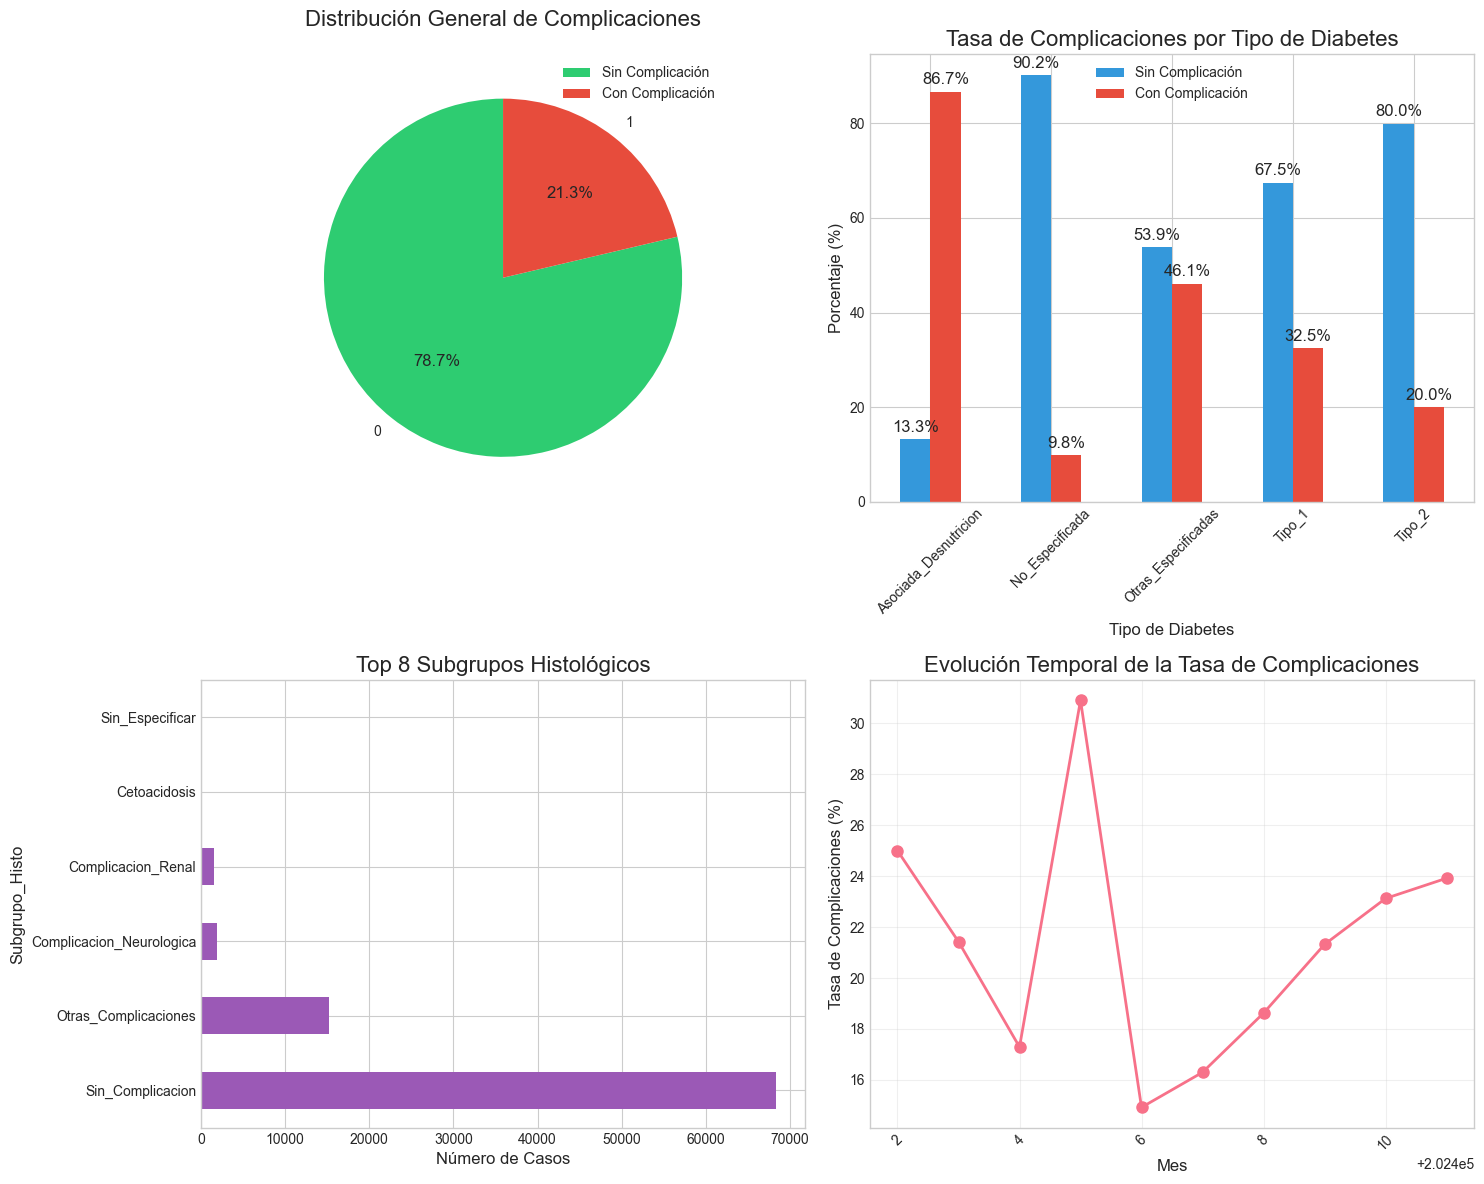


ESTADÍSTICAS DE COMPLICACIONES POR TIPO DE DIABETES:
--------------------------------------------------
Asociada_Desnutricion: 340/392 (86.73%)
No_Especificada: 253/2,582 (9.80%)
Otras_Especificadas: 1,799/3,900 (46.13%)
Tipo_1: 278/855 (32.51%)
Tipo_2: 15,866/79,207 (20.03%)


In [37]:
# Crear figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Distribución general de complicaciones
comp_counts = df['Complicacion'].value_counts()
colors = ['#2ecc71', '#e74c3c']
comp_counts.plot(kind='pie', ax=axes[0,0], colors=colors, autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Distribución General de Complicaciones', fontsize=16, pad=20)
axes[0,0].set_ylabel('')
axes[0,0].legend(['Sin Complicación', 'Con Complicación'], loc='best')

# 2. Complicaciones por tipo de diabetes
comp_tipo = pd.crosstab(df['Tipo_DM'], df['Complicacion'])
comp_tipo_pct = pd.crosstab(df['Tipo_DM'], df['Complicacion'], normalize='index') * 100
comp_tipo_pct.plot(kind='bar', ax=axes[0,1], color=['#3498db', '#e74c3c'])
axes[0,1].set_title('Tasa de Complicaciones por Tipo de Diabetes', fontsize=16)
axes[0,1].set_xlabel('Tipo de Diabetes')
axes[0,1].set_ylabel('Porcentaje (%)')
axes[0,1].legend(['Sin Complicación', 'Con Complicación'])
axes[0,1].tick_params(axis='x', rotation=45)

# Agregar valores en las barras
for container in axes[0,1].containers:
    axes[0,1].bar_label(container, fmt='%.1f%%', padding=3)

# 3. Distribución de subgrupos histológicos
subgrupo_counts = df['Subgrupo_Histo'].value_counts().head(8)
subgrupo_counts.plot(kind='barh', ax=axes[1,0], color='#9b59b6')
axes[1,0].set_title('Top 8 Subgrupos Histológicos', fontsize=16)
axes[1,0].set_xlabel('Número de Casos')

# 4. Evolución temporal de complicaciones
df_temporal = df[df['Mes_Muestra'] != 'Desconocido'].copy()
if len(df_temporal) > 0:
    comp_temporal = df_temporal.groupby('Mes_Muestra')['Complicacion'].agg(['sum', 'count'])
    comp_temporal['tasa'] = (comp_temporal['sum'] / comp_temporal['count'] * 100)
    comp_temporal['tasa'].plot(kind='line', ax=axes[1,1], marker='o', linewidth=2, markersize=8)
    axes[1,1].set_title('Evolución Temporal de la Tasa de Complicaciones', fontsize=16)
    axes[1,1].set_xlabel('Mes')
    axes[1,1].set_ylabel('Tasa de Complicaciones (%)')
    axes[1,1].grid(True, alpha=0.3)
    axes[1,1].tick_params(axis='x', rotation=45)

import os
os.makedirs('output/resultados', exist_ok=True)

plt.tight_layout()
plt.savefig('output/resultados/analisis_complicaciones.png', dpi=300, bbox_inches='tight')
plt.show()

# Estadísticas adicionales
print("\nESTADÍSTICAS DE COMPLICACIONES POR TIPO DE DIABETES:")
print("-"*50)
for tipo in comp_tipo.index:
    total = comp_tipo.loc[tipo].sum()
    con_comp = comp_tipo.loc[tipo, 1]
    print(f"{tipo}: {con_comp:,}/{total:,} ({con_comp/total*100:.2f}%)")

4. Análisis por Edad y Sexo

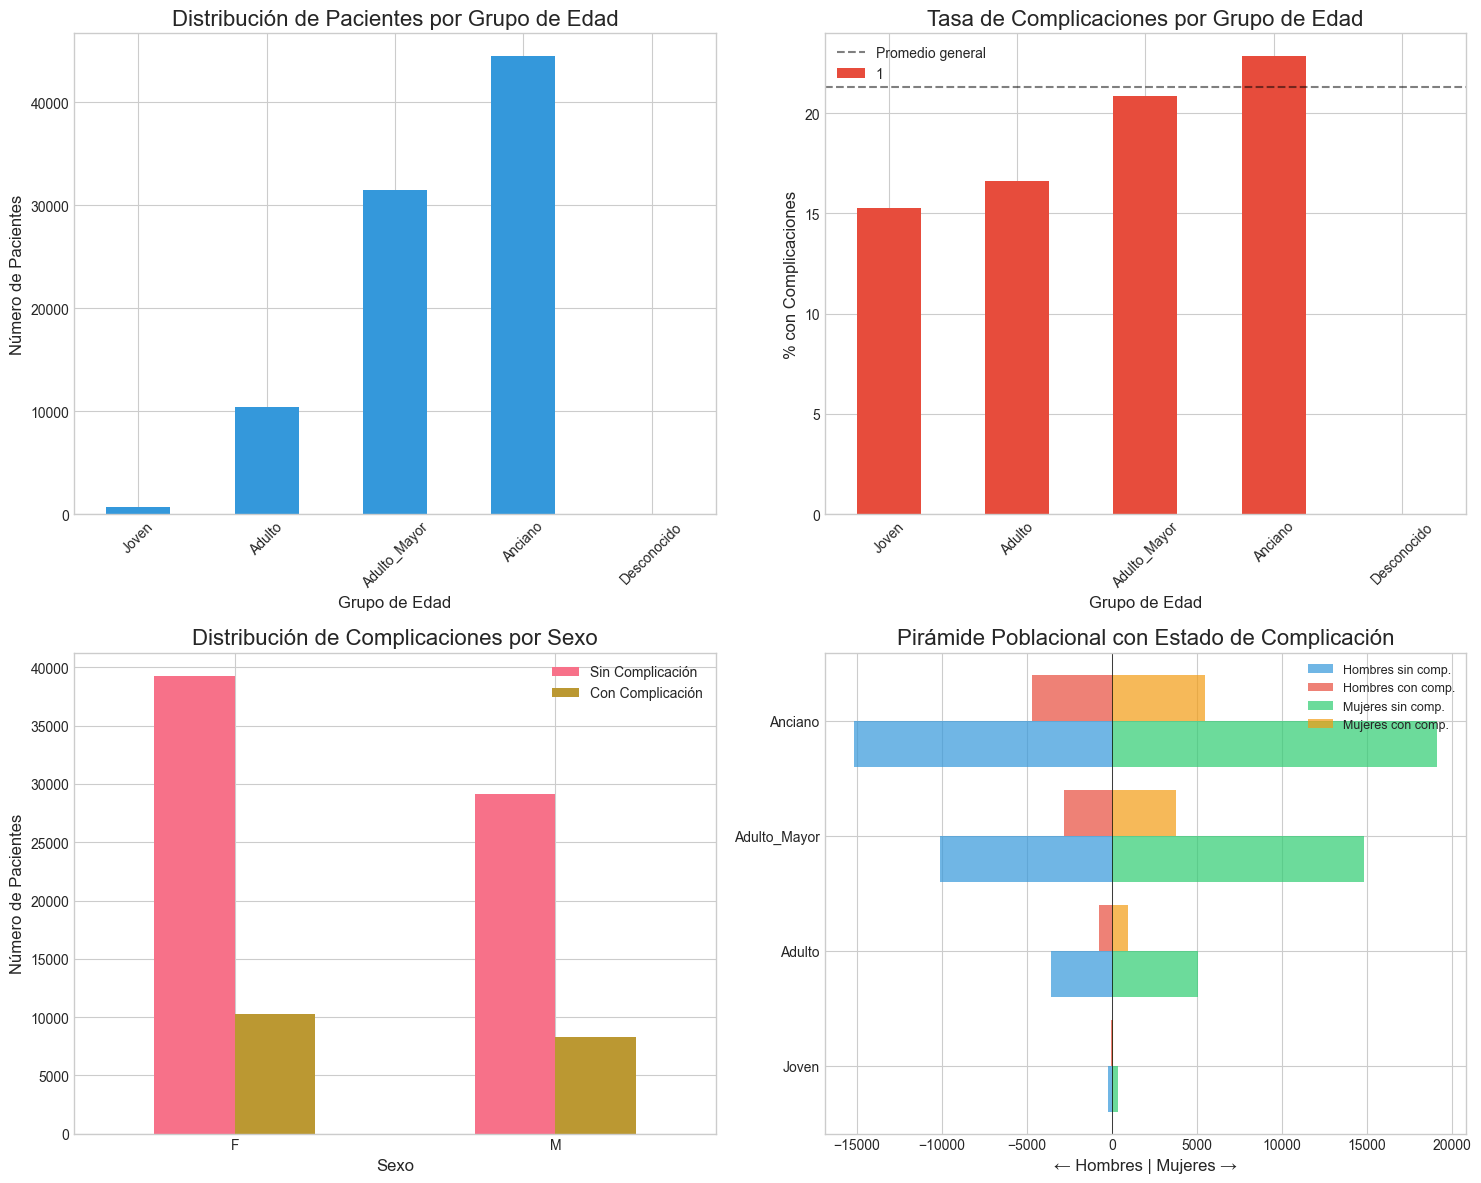


TASA DE COMPLICACIONES POR SEXO:
F: 20.66%
M: 22.20%


In [38]:
# Crear visualizaciones
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Distribución por edad
edad_order = ['Joven', 'Adulto', 'Adulto_Mayor', 'Anciano']
edad_counts = df['Edad_cat'].value_counts().reindex(edad_order + ['Desconocido'], fill_value=0)
edad_counts.plot(kind='bar', ax=axes[0,0], color='#3498db')
axes[0,0].set_title('Distribución de Pacientes por Grupo de Edad', fontsize=16)
axes[0,0].set_xlabel('Grupo de Edad')
axes[0,0].set_ylabel('Número de Pacientes')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Complicaciones por edad
comp_edad = pd.crosstab(df['Edad_cat'], df['Complicacion'], normalize='index') * 100
comp_edad = comp_edad.reindex(edad_order + ['Desconocido'], fill_value=0)
comp_edad[1].plot(kind='bar', ax=axes[0,1], color='#e74c3c')
axes[0,1].set_title('Tasa de Complicaciones por Grupo de Edad', fontsize=16)
axes[0,1].set_xlabel('Grupo de Edad')
axes[0,1].set_ylabel('% con Complicaciones')
axes[0,1].tick_params(axis='x', rotation=45)

# Agregar línea de promedio
axes[0,1].axhline(y=df['Complicacion'].mean()*100, color='black', linestyle='--', alpha=0.5, label='Promedio general')
axes[0,1].legend()

# 3. Distribución por sexo
sexo_comp = pd.crosstab(df['Sexo'], df['Complicacion'])
sexo_comp.plot(kind='bar', ax=axes[1,0], stacked=False)
axes[1,0].set_title('Distribución de Complicaciones por Sexo', fontsize=16)
axes[1,0].set_xlabel('Sexo')
axes[1,0].set_ylabel('Número de Pacientes')
axes[1,0].legend(['Sin Complicación', 'Con Complicación'])
axes[1,0].tick_params(axis='x', rotation=0)

# 4. Pirámide poblacional con complicaciones
edad_sexo_comp = pd.crosstab([df['Edad_cat'], df['Sexo']], df['Complicacion'])
edad_sexo_comp = edad_sexo_comp.reindex([(e, s) for e in edad_order for s in ['M', 'F']], fill_value=0)

# Preparar datos para pirámide
hombres_sin = []
hombres_con = []
mujeres_sin = []
mujeres_con = []

for edad in edad_order:
    try:
        hombres_sin.append(edad_sexo_comp.loc[(edad, 'M'), 0])
        hombres_con.append(edad_sexo_comp.loc[(edad, 'M'), 1])
        mujeres_sin.append(edad_sexo_comp.loc[(edad, 'F'), 0])
        mujeres_con.append(edad_sexo_comp.loc[(edad, 'F'), 1])
    except:
        hombres_sin.append(0)
        hombres_con.append(0)
        mujeres_sin.append(0)
        mujeres_con.append(0)

y_pos = np.arange(len(edad_order))
ax = axes[1,1]

# Graficar pirámide
ax.barh(y_pos - 0.2, [-x for x in hombres_sin], 0.4, label='Hombres sin comp.', color='#3498db', alpha=0.7)
ax.barh(y_pos + 0.2, [-x for x in hombres_con], 0.4, label='Hombres con comp.', color='#e74c3c', alpha=0.7)
ax.barh(y_pos - 0.2, mujeres_sin, 0.4, label='Mujeres sin comp.', color='#2ecc71', alpha=0.7)
ax.barh(y_pos + 0.2, mujeres_con, 0.4, label='Mujeres con comp.', color='#f39c12', alpha=0.7)

ax.set_yticks(y_pos)
ax.set_yticklabels(edad_order)
ax.set_xlabel('← Hombres | Mujeres →')
ax.set_title('Pirámide Poblacional con Estado de Complicación', fontsize=16)
ax.legend(loc='upper right', fontsize=9)
ax.axvline(x=0, color='black', linewidth=0.5)

plt.tight_layout()
plt.savefig('output/resultados/analisis_edad_sexo.png', dpi=300, bbox_inches='tight')
plt.show()

# Estadísticas adicionales
print("\nTASA DE COMPLICACIONES POR SEXO:")
sexo_comp_pct = pd.crosstab(df['Sexo'], df['Complicacion'], normalize='index') * 100
for sexo in sexo_comp_pct.index:
    print(f"{sexo}: {sexo_comp_pct.loc[sexo, 1]:.2f}%")

5. Análisis de Variables de Laboratorio

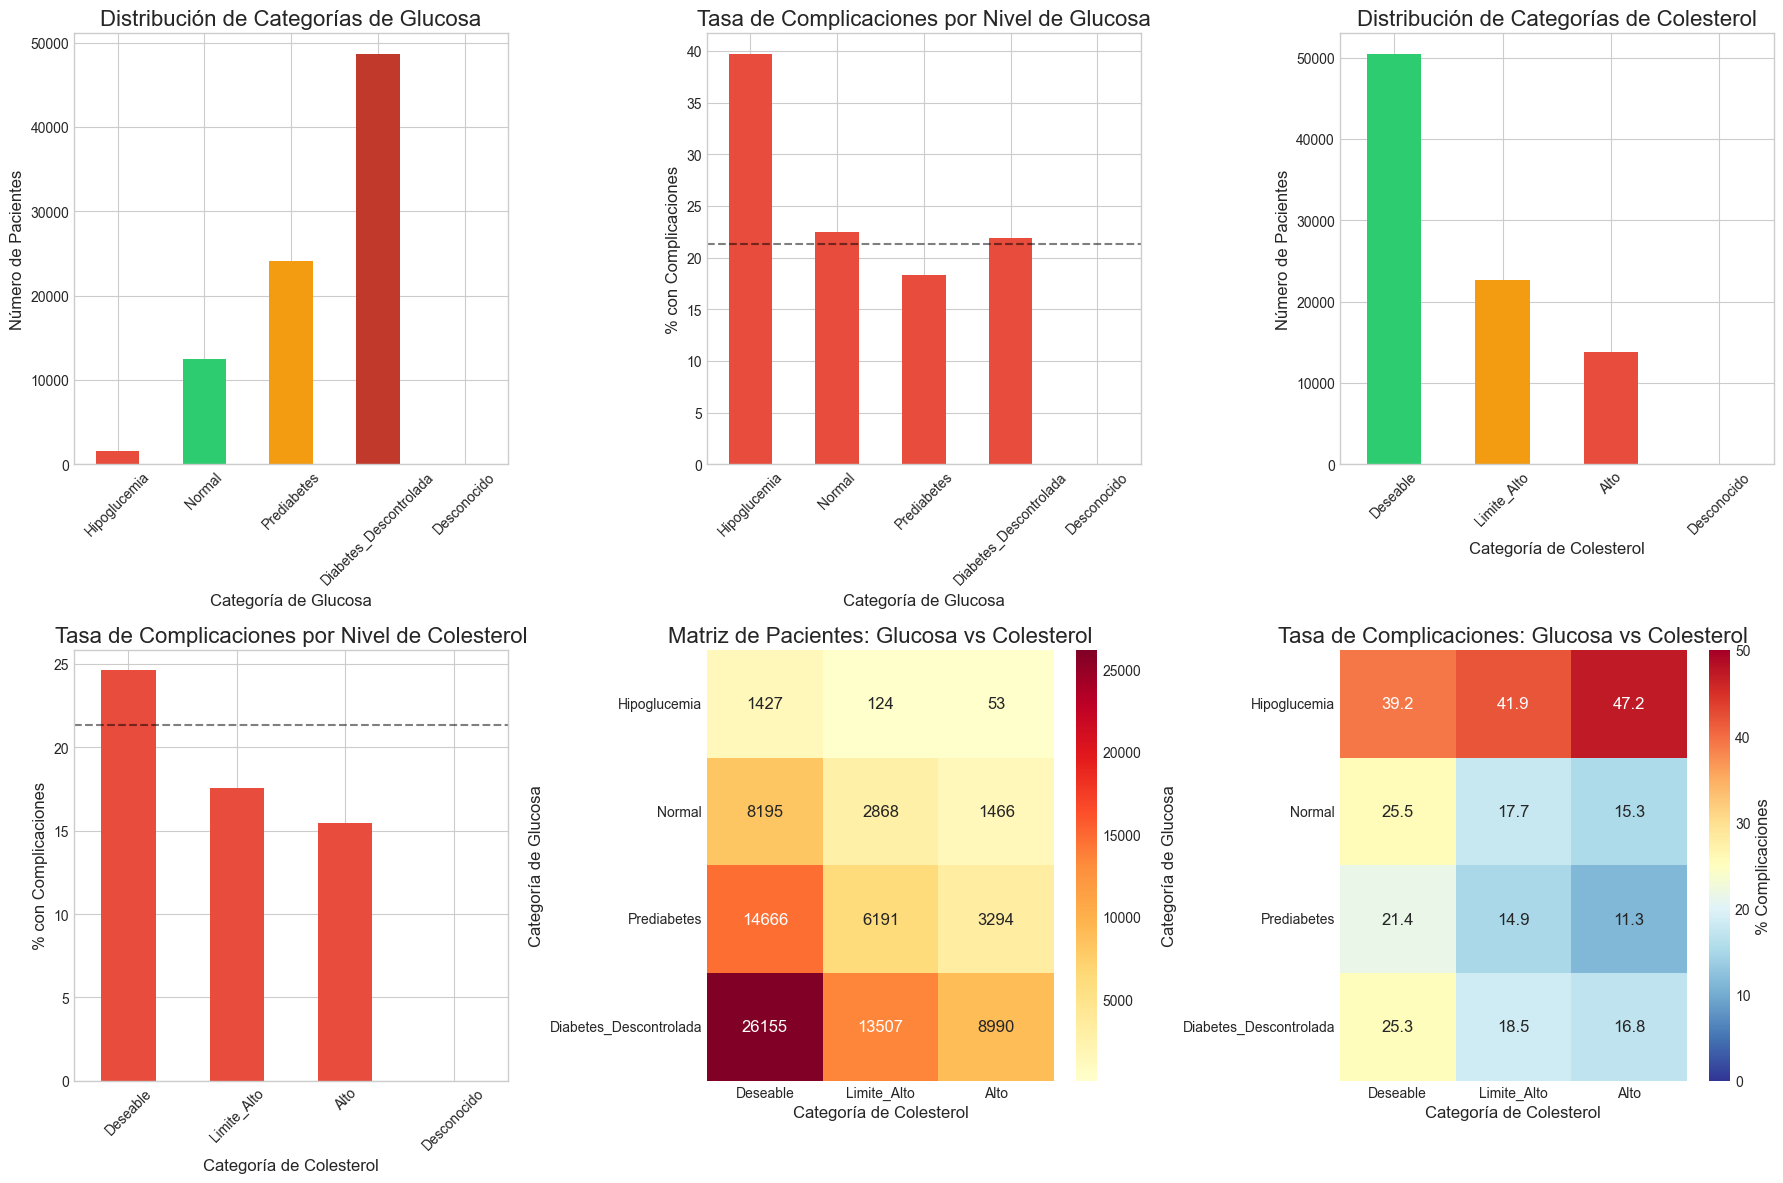


PACIENTES CON DATOS DE LABORATORIO:
Con datos de glucosa: 86,936 (100.0%)
Con datos de colesterol: 86,936 (100.0%)
Con ambos datos: 86,936


In [39]:
# Crear visualizaciones para glucosa y colesterol
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Distribución de categorías de glucosa
glucosa_order = ['Hipoglucemia', 'Normal', 'Prediabetes', 'Diabetes_Descontrolada', 'Desconocido']
glucosa_counts = df['Glucosa_cat'].value_counts().reindex(glucosa_order, fill_value=0)
colors_glucosa = ['#e74c3c', '#2ecc71', '#f39c12', '#c0392b', '#95a5a6']
glucosa_counts.plot(kind='bar', ax=axes[0,0], color=colors_glucosa)
axes[0,0].set_title('Distribución de Categorías de Glucosa', fontsize=16)
axes[0,0].set_xlabel('Categoría de Glucosa')
axes[0,0].set_ylabel('Número de Pacientes')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Complicaciones por nivel de glucosa
comp_glucosa = pd.crosstab(df['Glucosa_cat'], df['Complicacion'], normalize='index') * 100
comp_glucosa = comp_glucosa.reindex(glucosa_order, fill_value=0)
comp_glucosa[1].plot(kind='bar', ax=axes[0,1], color='#e74c3c')
axes[0,1].set_title('Tasa de Complicaciones por Nivel de Glucosa', fontsize=16)
axes[0,1].set_xlabel('Categoría de Glucosa')
axes[0,1].set_ylabel('% con Complicaciones')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].axhline(y=df['Complicacion'].mean()*100, color='black', linestyle='--', alpha=0.5)

# 3. Distribución de categorías de colesterol
colesterol_order = ['Deseable', 'Limite_Alto', 'Alto', 'Desconocido']
colesterol_counts = df['Colesterol_cat'].value_counts().reindex(colesterol_order, fill_value=0)
colors_colesterol = ['#2ecc71', '#f39c12', '#e74c3c', '#95a5a6']
colesterol_counts.plot(kind='bar', ax=axes[0,2], color=colors_colesterol)
axes[0,2].set_title('Distribución de Categorías de Colesterol', fontsize=16)
axes[0,2].set_xlabel('Categoría de Colesterol')
axes[0,2].set_ylabel('Número de Pacientes')
axes[0,2].tick_params(axis='x', rotation=45)

# 4. Complicaciones por nivel de colesterol
comp_colesterol = pd.crosstab(df['Colesterol_cat'], df['Complicacion'], normalize='index') * 100
comp_colesterol = comp_colesterol.reindex(colesterol_order, fill_value=0)
comp_colesterol[1].plot(kind='bar', ax=axes[1,0], color='#e74c3c')
axes[1,0].set_title('Tasa de Complicaciones por Nivel de Colesterol', fontsize=16)
axes[1,0].set_xlabel('Categoría de Colesterol')
axes[1,0].set_ylabel('% con Complicaciones')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].axhline(y=df['Complicacion'].mean()*100, color='black', linestyle='--', alpha=0.5)

# 5. Heatmap de glucosa vs colesterol
glucosa_colesterol = pd.crosstab(df['Glucosa_cat'], df['Colesterol_cat'])
glucosa_colesterol = glucosa_colesterol.reindex(index=glucosa_order[:-1], columns=colesterol_order[:-1], fill_value=0)
sns.heatmap(glucosa_colesterol, annot=True, fmt='d', cmap='YlOrRd', ax=axes[1,1])
axes[1,1].set_title('Matriz de Pacientes: Glucosa vs Colesterol', fontsize=16)
axes[1,1].set_xlabel('Categoría de Colesterol')
axes[1,1].set_ylabel('Categoría de Glucosa')

# 6. Tasa de complicaciones por combinación glucosa-colesterol
comp_lab = df.groupby(['Glucosa_cat', 'Colesterol_cat'])['Complicacion'].agg(['mean', 'count'])
comp_lab = comp_lab[comp_lab['count'] >= 10]  # Filtrar combinaciones con pocos casos
comp_lab['mean_pct'] = comp_lab['mean'] * 100
comp_lab_pivot = comp_lab['mean_pct'].reset_index().pivot(index='Glucosa_cat', columns='Colesterol_cat', values='mean_pct')

# Reindexar para orden consistente
try:
    comp_lab_pivot = comp_lab_pivot.reindex(index=glucosa_order[:-1], columns=colesterol_order[:-1])
    sns.heatmap(comp_lab_pivot, annot=True, fmt='.1f', cmap='RdYlBu_r', ax=axes[1,2], 
                cbar_kws={'label': '% Complicaciones'}, vmin=0, vmax=50)
    axes[1,2].set_title('Tasa de Complicaciones: Glucosa vs Colesterol', fontsize=16)
    axes[1,2].set_xlabel('Categoría de Colesterol')
    axes[1,2].set_ylabel('Categoría de Glucosa')
except:
    axes[1,2].text(0.5, 0.5, 'Datos insuficientes para esta visualización', 
                ha='center', va='center', transform=axes[1,2].transAxes)
    axes[1,2].set_title('Tasa de Complicaciones: Glucosa vs Colesterol', fontsize=16)

plt.tight_layout()
plt.savefig('output/resultados/analisis_laboratorio.png', dpi=300, bbox_inches='tight')
plt.show()

# Estadísticas adicionales
print("\nPACIENTES CON DATOS DE LABORATORIO:")
print(f"Con datos de glucosa: {(df['Glucosa_cat'] != 'Desconocido').sum():,} ({(df['Glucosa_cat'] != 'Desconocido').mean()*100:.1f}%)")
print(f"Con datos de colesterol: {(df['Colesterol_cat'] != 'Desconocido').sum():,} ({(df['Colesterol_cat'] != 'Desconocido').mean()*100:.1f}%)")
print(f"Con ambos datos: {((df['Glucosa_cat'] != 'Desconocido') & (df['Colesterol_cat'] != 'Desconocido')).sum():,}")

6. Análisis Geográfico con Enfoque en PUNO

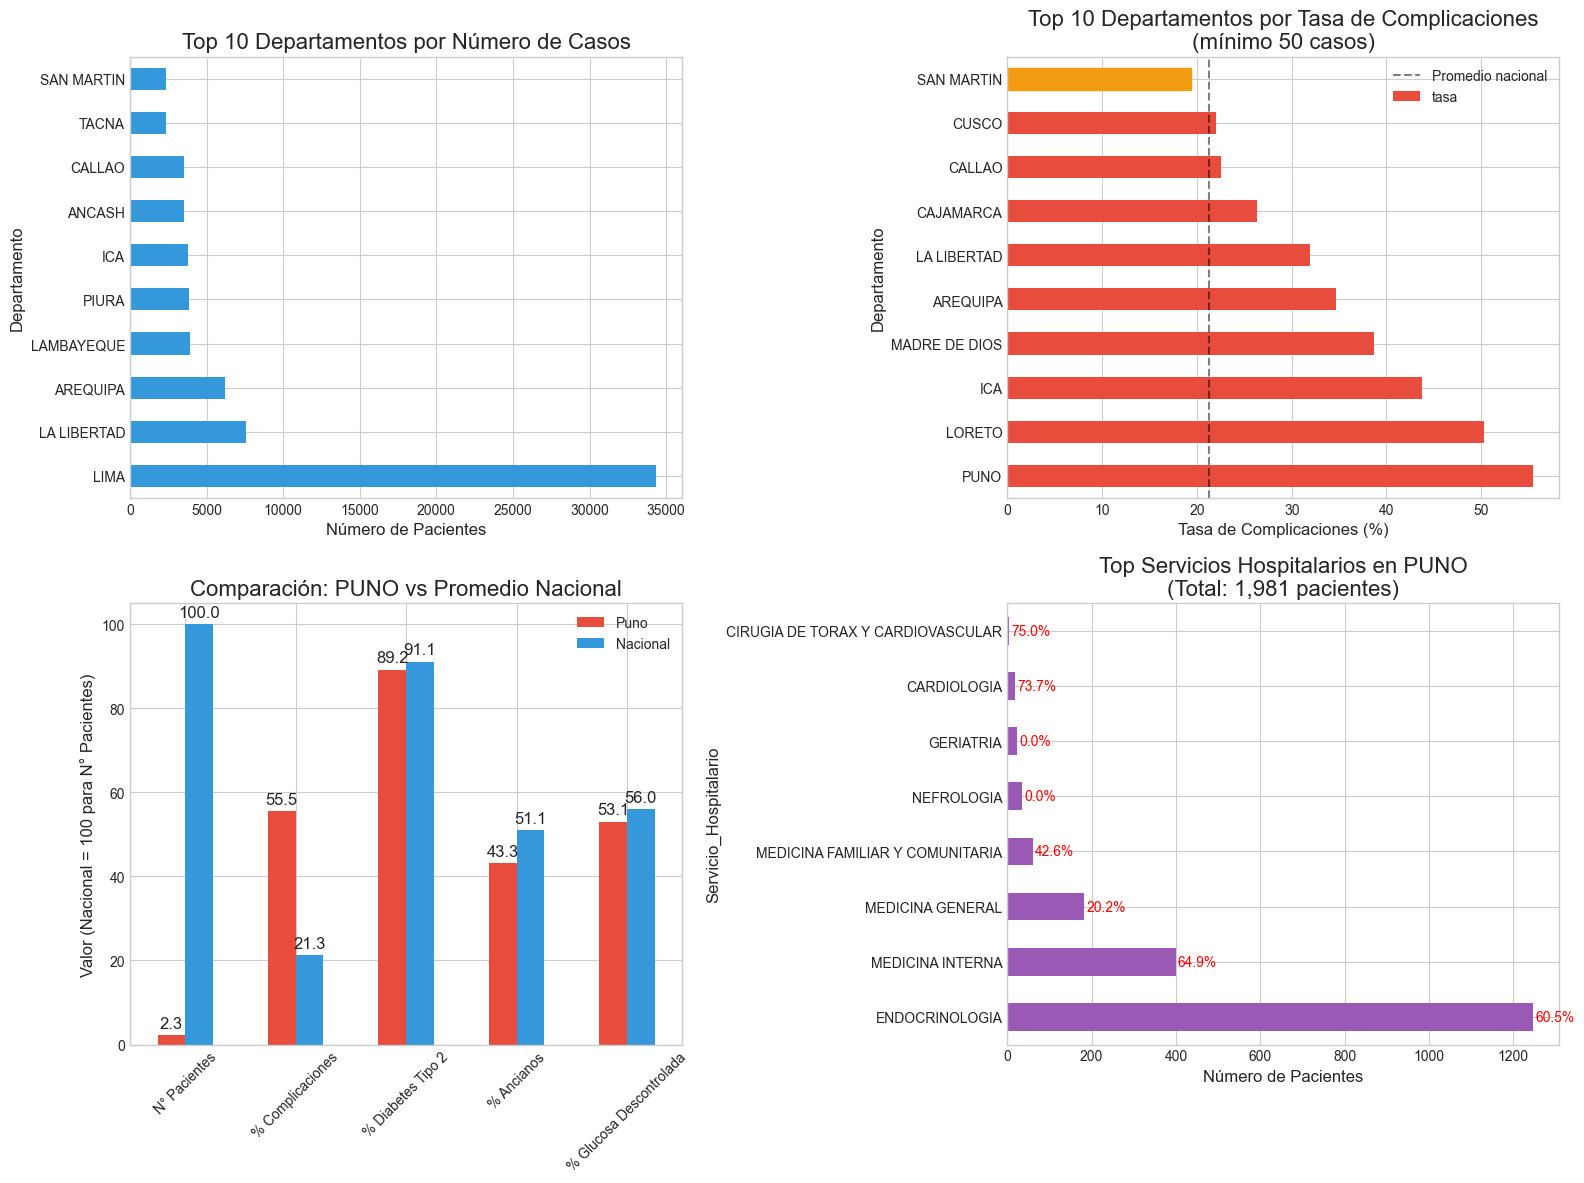


ANÁLISIS DETALLADO: DEPARTAMENTO DE PUNO

Total de pacientes: 1,981
Tasa de complicaciones: 55.48%
Posición en ranking nacional: Fuera del top 10


Distribución por tipo de diabetes en Puno:
  Tipo_2: 1,767 (89.2%)
  Asociada_Desnutricion: 149 (7.5%)
  Otras_Especificadas: 50 (2.5%)
  Tipo_1: 13 (0.7%)
  No_Especificada: 2 (0.1%)


Distribución por edad en Puno:
  Anciano: 857 (43.3%)
  Adulto_Mayor: 807 (40.7%)
  Adulto: 294 (14.8%)
  Joven: 23 (1.2%)


In [40]:
# Análisis geográfico
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Top 10 departamentos por número de casos
dept_counts = df['Departamento'].value_counts().head(10)
dept_counts.plot(kind='barh', ax=axes[0,0], color='#3498db')
axes[0,0].set_title('Top 10 Departamentos por Número de Casos', fontsize=16)
axes[0,0].set_xlabel('Número de Pacientes')

# Resaltar Puno si está en el top 10
if 'PUNO' in dept_counts.index:
    puno_pos = dept_counts.index.get_loc('PUNO')
    axes[0,0].patches[len(dept_counts) - 1 - puno_pos].set_color('#e74c3c')

# 2. Tasa de complicaciones por departamento (top 10)
dept_comp = df.groupby('Departamento')['Complicacion'].agg(['mean', 'count'])
dept_comp = dept_comp[dept_comp['count'] >= 50]  # Filtrar departamentos con pocos casos
dept_comp['tasa'] = dept_comp['mean'] * 100
dept_comp_top = dept_comp.nlargest(10, 'tasa')

dept_comp_top['tasa'].plot(kind='barh', ax=axes[0,1], color='#e74c3c')
axes[0,1].set_title('Top 10 Departamentos por Tasa de Complicaciones\n(mínimo 50 casos)', fontsize=16)
axes[0,1].set_xlabel('Tasa de Complicaciones (%)')
axes[0,1].axvline(x=df['Complicacion'].mean()*100, color='black', linestyle='--', alpha=0.5, label='Promedio nacional')
axes[0,1].legend()

# Resaltar Puno
if 'PUNO' in dept_comp_top.index:
    puno_pos = dept_comp_top.index.get_loc('PUNO')
    axes[0,1].patches[len(dept_comp_top) - 1 - puno_pos].set_color('#f39c12')

# 3. Análisis específico de PUNO
df_puno = df[df['Departamento'] == 'PUNO']
if len(df_puno) > 0:
    # Comparación Puno vs Nacional
    comparacion = pd.DataFrame({
        'Puno': [
            len(df_puno),
            df_puno['Complicacion'].mean() * 100,
            (df_puno['Tipo_DM'] == 'Tipo_2').mean() * 100,
            (df_puno['Edad_cat'] == 'Anciano').mean() * 100,
            (df_puno['Glucosa_cat'] == 'Diabetes_Descontrolada').mean() * 100
        ],
        'Nacional': [
            len(df),
            df['Complicacion'].mean() * 100,
            (df['Tipo_DM'] == 'Tipo_2').mean() * 100,
            (df['Edad_cat'] == 'Anciano').mean() * 100,
            (df['Glucosa_cat'] == 'Diabetes_Descontrolada').mean() * 100
        ]
    }, index=['N° Pacientes', '% Complicaciones', '% Diabetes Tipo 2', 
            '% Ancianos', '% Glucosa Descontrolada'])
    
    # Normalizar para visualización (excepto N° Pacientes)
    comparacion_norm = comparacion.copy()
    comparacion_norm.loc['N° Pacientes'] = comparacion_norm.loc['N° Pacientes'] / comparacion_norm.loc['N° Pacientes', 'Nacional'] * 100
    
    comparacion_norm.plot(kind='bar', ax=axes[1,0], color=['#e74c3c', '#3498db'])
    axes[1,0].set_title('Comparación: PUNO vs Promedio Nacional', fontsize=16)
    axes[1,0].set_ylabel('Valor (Nacional = 100 para N° Pacientes)')
    axes[1,0].tick_params(axis='x', rotation=45)
    axes[1,0].legend(['Puno', 'Nacional'])
    
    # Agregar valores
    for container in axes[1,0].containers:
        axes[1,0].bar_label(container, fmt='%.1f', padding=3)
    
    # 4. Servicios hospitalarios en Puno
    servicios_puno = df_puno['Servicio_Hospitalario'].value_counts().head(8)
    servicios_puno.plot(kind='barh', ax=axes[1,1], color='#9b59b6')
    axes[1,1].set_title(f'Top Servicios Hospitalarios en PUNO\n(Total: {len(df_puno):,} pacientes)', fontsize=16)
    axes[1,1].set_xlabel('Número de Pacientes')
    
    # Agregar porcentaje de complicaciones por servicio
    for i, (servicio, count) in enumerate(servicios_puno.items()):
        comp_rate = df_puno[df_puno['Servicio_Hospitalario'] == servicio]['Complicacion'].mean() * 100
        axes[1,1].text(count + 5, i, f'{comp_rate:.1f}%', va='center', fontsize=10, color='red')
    
else:
    axes[1,0].text(0.5, 0.5, 'No hay datos disponibles para PUNO', 
                ha='center', va='center', transform=axes[1,0].transAxes, fontsize=14)
    axes[1,1].text(0.5, 0.5, 'No hay datos disponibles para PUNO', 
                ha='center', va='center', transform=axes[1,1].transAxes, fontsize=14)

plt.tight_layout()
plt.savefig('output/resultados/analisis_geografico_puno.png', dpi=300, bbox_inches='tight')
plt.show()

# Resumen estadístico de Puno
if len(df_puno) > 0:
    print("\n" + "="*60)
    print("ANÁLISIS DETALLADO: DEPARTAMENTO DE PUNO")
    print("="*60)
    print(f"\nTotal de pacientes: {len(df_puno):,}")
    print(f"Tasa de complicaciones: {df_puno['Complicacion'].mean()*100:.2f}%")
    print(f"Posición en ranking nacional: {list(dept_counts.index).index('PUNO')+1 if 'PUNO' in dept_counts.index else 'Fuera del top 10'}")
    
    print("\n\nDistribución por tipo de diabetes en Puno:")
    for tipo, count in df_puno['Tipo_DM'].value_counts().items():
        print(f"  {tipo}: {count:,} ({count/len(df_puno)*100:.1f}%)")
    
    print("\n\nDistribución por edad en Puno:")
    for edad, count in df_puno['Edad_cat'].value_counts().items():
        print(f"  {edad}: {count:,} ({count/len(df_puno)*100:.1f}%)")

7. Análisis de Servicios Hospitalarios

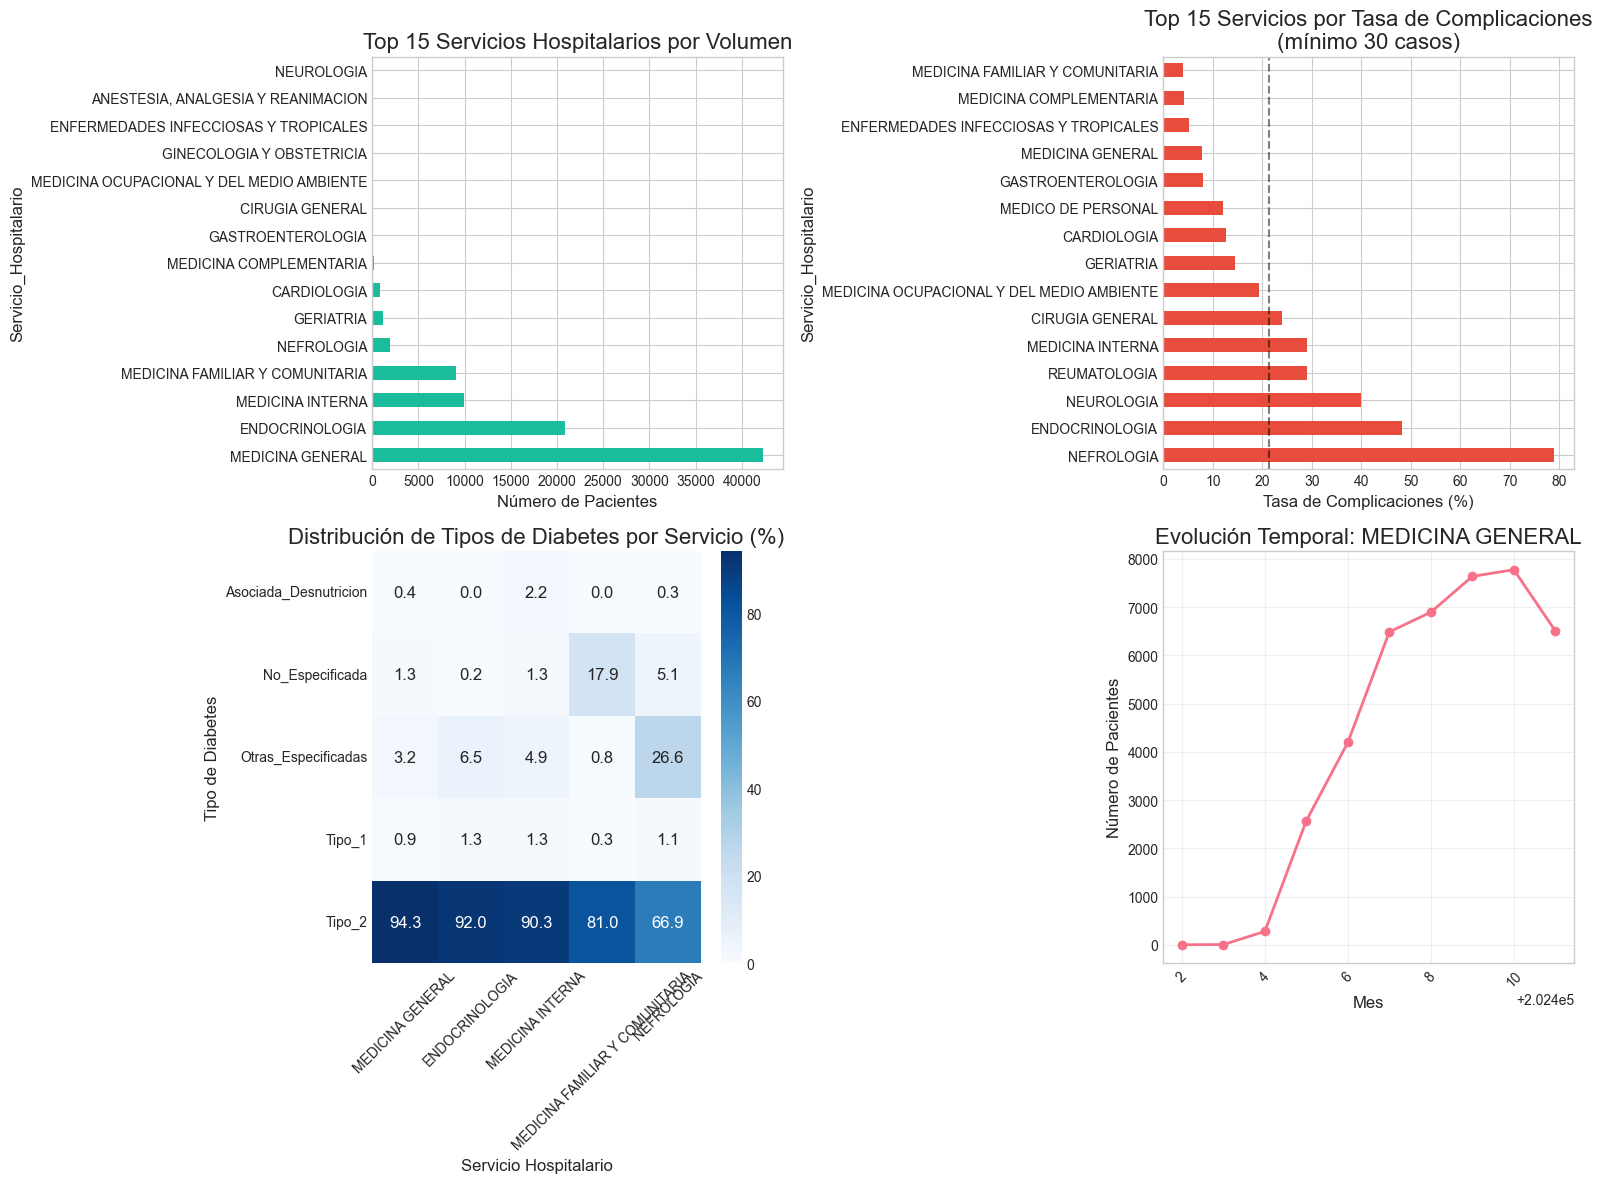

In [41]:
# Análisis de servicios
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Top servicios por volumen
servicios_counts = df['Servicio_Hospitalario'].value_counts().head(15)
servicios_counts.plot(kind='barh', ax=axes[0,0], color='#1abc9c')
axes[0,0].set_title('Top 15 Servicios Hospitalarios por Volumen', fontsize=16)
axes[0,0].set_xlabel('Número de Pacientes')

# 2. Servicios con mayor tasa de complicaciones
servicios_comp = df.groupby('Servicio_Hospitalario')['Complicacion'].agg(['mean', 'count'])
servicios_comp = servicios_comp[servicios_comp['count'] >= 30]  # Mínimo 30 casos
servicios_comp['tasa'] = servicios_comp['mean'] * 100
servicios_comp_top = servicios_comp.nlargest(15, 'tasa')

servicios_comp_top['tasa'].plot(kind='barh', ax=axes[0,1], color='#e74c3c')
axes[0,1].set_title('Top 15 Servicios por Tasa de Complicaciones\n(mínimo 30 casos)', fontsize=16)
axes[0,1].set_xlabel('Tasa de Complicaciones (%)')
axes[0,1].axvline(x=df['Complicacion'].mean()*100, color='black', linestyle='--', alpha=0.5)

# 3. Matriz de servicios vs tipo de diabetes
servicios_top5 = servicios_counts.head(5).index
tipo_servicio = pd.crosstab(df['Tipo_DM'], df['Servicio_Hospitalario'])[servicios_top5]
tipo_servicio_norm = tipo_servicio.div(tipo_servicio.sum(axis=0), axis=1) * 100

sns.heatmap(tipo_servicio_norm, annot=True, fmt='.1f', cmap='Blues', ax=axes[1,0])
axes[1,0].set_title('Distribución de Tipos de Diabetes por Servicio (%)', fontsize=16)
axes[1,0].set_xlabel('Servicio Hospitalario')
axes[1,0].set_ylabel('Tipo de Diabetes')
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Evolución temporal por servicio principal
servicio_principal = servicios_counts.index[0]
df_servicio = df[(df['Servicio_Hospitalario'] == servicio_principal) & 
                (df['Mes_Muestra'] != 'Desconocido')]

if len(df_servicio) > 0:
    temporal_servicio = df_servicio.groupby('Mes_Muestra').size()
    temporal_servicio.plot(kind='line', ax=axes[1,1], marker='o', linewidth=2)
    axes[1,1].set_title(f'Evolución Temporal: {servicio_principal}', fontsize=16)
    axes[1,1].set_xlabel('Mes')
    axes[1,1].set_ylabel('Número de Pacientes')
    axes[1,1].grid(True, alpha=0.3)
    axes[1,1].tick_params(axis='x', rotation=45)
else:
    axes[1,1].text(0.5, 0.5, 'Datos temporales insuficientes', 
                ha='center', va='center', transform=axes[1,1].transAxes)

plt.tight_layout()
plt.savefig('output/resultados/analisis_servicios.png', dpi=300, bbox_inches='tight')
plt.show()

8. Análisis de Correlaciones

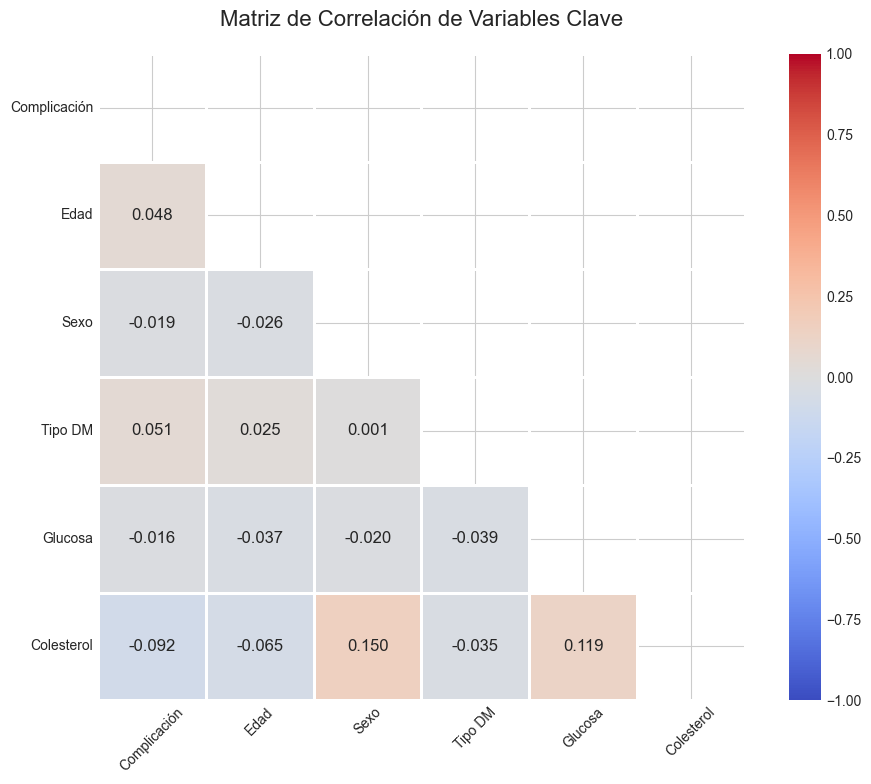


CORRELACIONES CON LA VARIABLE OBJETIVO (COMPLICACIÓN):
--------------------------------------------------
Tipo Dm: 0.051
Edad: 0.048
Glucosa: -0.016
Sexo: -0.019
Colesterol: -0.092


TEST DE INDEPENDENCIA (Chi-cuadrado):
--------------------------------------------------

Edad_cat:
  Chi2: 216.46
  p-value: 0.0000
  Significativo: Sí

Sexo:
  Chi2: 30.29
  p-value: 0.0000
  Significativo: Sí

Tipo_DM:
  Chi2: 2777.36
  p-value: 0.0000
  Significativo: Sí

Glucosa_cat:
  Chi2: 468.72
  p-value: 0.0000
  Significativo: Sí

Colesterol_cat:
  Chi2: 796.74
  p-value: 0.0000
  Significativo: Sí


In [42]:
# Preparar datos para correlación
# Convertir variables categóricas a numéricas para análisis
df_encoded = df.copy()

# Codificar variables binarias
df_encoded['Sexo_num'] = df_encoded['Sexo'].map({'M': 0, 'F': 1, 'Desconocido': -1})

# Codificar edad ordinal
edad_map = {'Joven': 1, 'Adulto': 2, 'Adulto_Mayor': 3, 'Anciano': 4, 'Desconocido': 0}
df_encoded['Edad_num'] = df_encoded['Edad_cat'].map(edad_map)

# Codificar glucosa ordinal
glucosa_map = {'Hipoglucemia': 1, 'Normal': 2, 'Prediabetes': 3, 
               'Diabetes_Descontrolada': 4, 'Desconocido': 0}
df_encoded['Glucosa_num'] = df_encoded['Glucosa_cat'].map(glucosa_map)

# Codificar colesterol ordinal
colesterol_map = {'Deseable': 1, 'Limite_Alto': 2, 'Alto': 3, 'Desconocido': 0}
df_encoded['Colesterol_num'] = df_encoded['Colesterol_cat'].map(colesterol_map)

# Codificar tipo de diabetes
tipo_map = {'Tipo_1': 1, 'Tipo_2': 2, 'Asociada_Desnutricion': 3, 
            'Otras_Especificadas': 4, 'No_Especificada': 5}
df_encoded['Tipo_DM_num'] = df_encoded['Tipo_DM'].map(tipo_map)

# Seleccionar variables para correlación
vars_corr = ['Complicacion', 'Edad_num', 'Sexo_num', 'Tipo_DM_num', 
             'Glucosa_num', 'Colesterol_num']
corr_matrix = df_encoded[vars_corr].corr()

# Visualizar matriz de correlación
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, vmin=-1, vmax=1, square=True, linewidths=1)
plt.title('Matriz de Correlación de Variables Clave', fontsize=16, pad=20)

# Renombrar etiquetas para mejor legibilidad
labels = ['Complicación', 'Edad', 'Sexo', 'Tipo DM', 'Glucosa', 'Colesterol']
plt.gca().set_xticklabels(labels, rotation=45)
plt.gca().set_yticklabels(labels, rotation=0)

plt.tight_layout()
plt.savefig('output/resultados/matriz_correlacion.png', dpi=300, bbox_inches='tight')
plt.show()

# Análisis de correlaciones con complicación
print("\nCORRELACIONES CON LA VARIABLE OBJETIVO (COMPLICACIÓN):")
print("-"*50)
corr_with_comp = corr_matrix['Complicacion'].drop('Complicacion').sort_values(ascending=False)
for var, corr in corr_with_comp.items():
    var_name = var.replace('_num', '').replace('_', ' ').title()
    print(f"{var_name}: {corr:.3f}")
    
# Test de independencia chi-cuadrado
print("\n\nTEST DE INDEPENDENCIA (Chi-cuadrado):")
print("-"*50)
from scipy.stats import chi2_contingency

variables_cat = ['Edad_cat', 'Sexo', 'Tipo_DM', 'Glucosa_cat', 'Colesterol_cat']
for var in variables_cat:
    tabla_contingencia = pd.crosstab(df[var], df['Complicacion'])
    chi2, p_value, dof, expected = chi2_contingency(tabla_contingencia)
    print(f"\n{var}:")
    print(f"  Chi2: {chi2:.2f}")
    print(f"  p-value: {p_value:.4f}")
    print(f"  Significativo: {'Sí' if p_value < 0.05 else 'No'}")

9. Análisis de Patrones Temporales

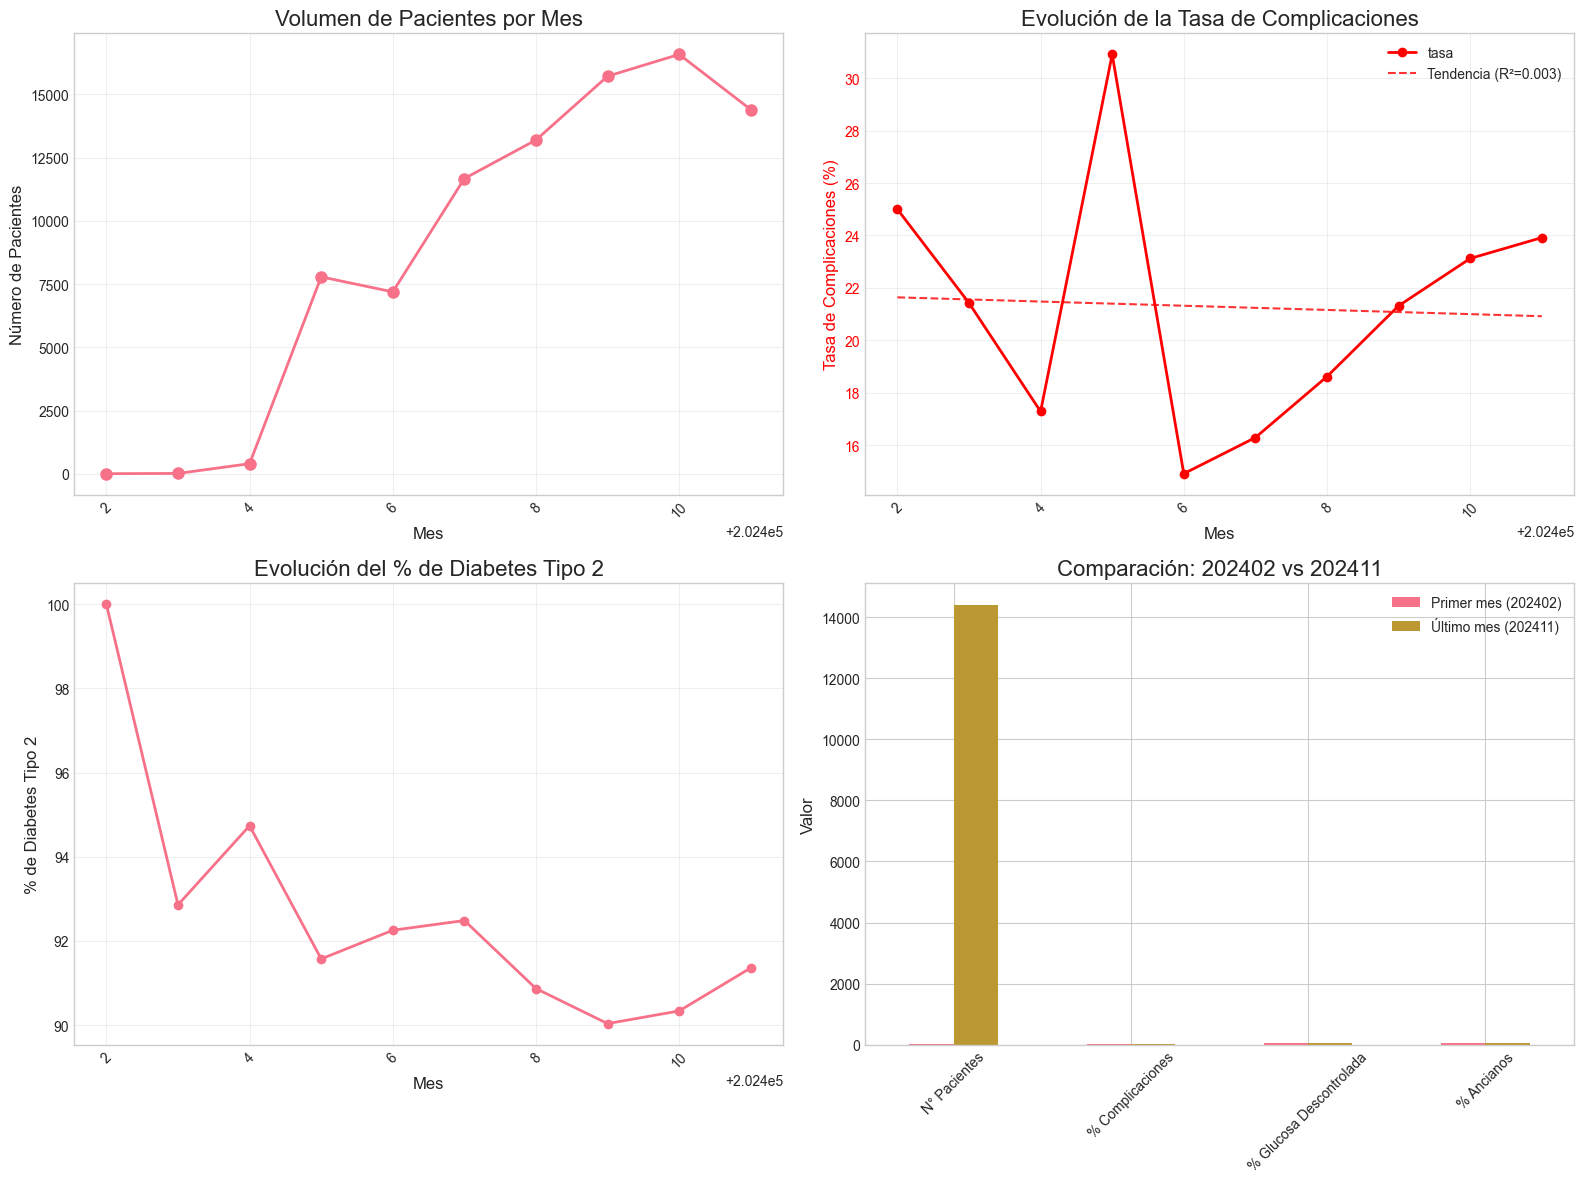


RESUMEN DE ANÁLISIS TEMPORAL:
--------------------------------------------------
Período analizado: 202402 a 202411
Total de meses: 10
Promedio mensual de pacientes: 8694
Tendencia de complicaciones: Decreciente (-0.080% por mes)


In [43]:
# Filtrar datos con información temporal
df_temporal = df[df['Mes_Muestra'] != 'Desconocido'].copy()

if len(df_temporal) > 0:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Volumen de pacientes por mes
    volumen_mensual = df_temporal['Mes_Muestra'].value_counts().sort_index()
    volumen_mensual.plot(kind='line', ax=axes[0,0], marker='o', linewidth=2, markersize=8)
    axes[0,0].set_title('Volumen de Pacientes por Mes', fontsize=16)
    axes[0,0].set_xlabel('Mes')
    axes[0,0].set_ylabel('Número de Pacientes')
    axes[0,0].grid(True, alpha=0.3)
    axes[0,0].tick_params(axis='x', rotation=45)
    
    # 2. Tasa de complicaciones mensual
    comp_mensual = df_temporal.groupby('Mes_Muestra')['Complicacion'].agg(['mean', 'count'])
    comp_mensual['tasa'] = comp_mensual['mean'] * 100
    
    ax2 = axes[0,1]
    comp_mensual['tasa'].plot(kind='line', ax=ax2, color='red', marker='o', linewidth=2)
    ax2.set_title('Evolución de la Tasa de Complicaciones', fontsize=16)
    ax2.set_xlabel('Mes')
    ax2.set_ylabel('Tasa de Complicaciones (%)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.grid(True, alpha=0.3)
    ax2.tick_params(axis='x', rotation=45)
    
    # Línea de tendencia
    from scipy import stats
    x = np.arange(len(comp_mensual))
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, comp_mensual['tasa'])
    line = slope * x + intercept
    ax2.plot(comp_mensual.index, line, 'r--', alpha=0.8, 
             label=f'Tendencia (R²={r_value**2:.3f})')
    ax2.legend()
    
    # 3. Distribución de tipos de diabetes por mes
    tipo_temporal = pd.crosstab(df_temporal['Mes_Muestra'], df_temporal['Tipo_DM'], normalize='index') * 100
    tipo_temporal['Tipo_2'].plot(kind='line', ax=axes[1,0], marker='o', linewidth=2)
    axes[1,0].set_title('Evolución del % de Diabetes Tipo 2', fontsize=16)
    axes[1,0].set_xlabel('Mes')
    axes[1,0].set_ylabel('% de Diabetes Tipo 2')
    axes[1,0].grid(True, alpha=0.3)
    axes[1,0].tick_params(axis='x', rotation=45)
    
    # 4. Comparación primer vs último mes
    meses_ordenados = sorted(df_temporal['Mes_Muestra'].unique())
    primer_mes = meses_ordenados[0]
    ultimo_mes = meses_ordenados[-1]
    
    df_primer = df_temporal[df_temporal['Mes_Muestra'] == primer_mes]
    df_ultimo = df_temporal[df_temporal['Mes_Muestra'] == ultimo_mes]
    
    comparacion_temporal = pd.DataFrame({
        primer_mes: [
            len(df_primer),
            df_primer['Complicacion'].mean() * 100,
            (df_primer['Glucosa_cat'] == 'Diabetes_Descontrolada').mean() * 100,
            (df_primer['Edad_cat'] == 'Anciano').mean() * 100
        ],
        ultimo_mes: [
            len(df_ultimo),
            df_ultimo['Complicacion'].mean() * 100,
            (df_ultimo['Glucosa_cat'] == 'Diabetes_Descontrolada').mean() * 100,
            (df_ultimo['Edad_cat'] == 'Anciano').mean() * 100
        ]
    }, index=['N° Pacientes', '% Complicaciones', '% Glucosa Descontrolada', '% Ancianos'])
    
    comparacion_temporal.plot(kind='bar', ax=axes[1,1])
    axes[1,1].set_title(f'Comparación: {primer_mes} vs {ultimo_mes}', fontsize=16)
    axes[1,1].set_ylabel('Valor')
    axes[1,1].tick_params(axis='x', rotation=45)
    axes[1,1].legend([f'Primer mes ({primer_mes})', f'Último mes ({ultimo_mes})'])
    
    plt.tight_layout()
    plt.savefig('output/resultados/analisis_temporal.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\nRESUMEN DE ANÁLISIS TEMPORAL:")
    print("-"*50)
    print(f"Período analizado: {primer_mes} a {ultimo_mes}")
    print(f"Total de meses: {len(meses_ordenados)}")
    print(f"Promedio mensual de pacientes: {volumen_mensual.mean():.0f}")
    print(f"Tendencia de complicaciones: {'Creciente' if slope > 0 else 'Decreciente'} ({slope:.3f}% por mes)")

10. Resumen Ejecutivo y Hallazgos Clave

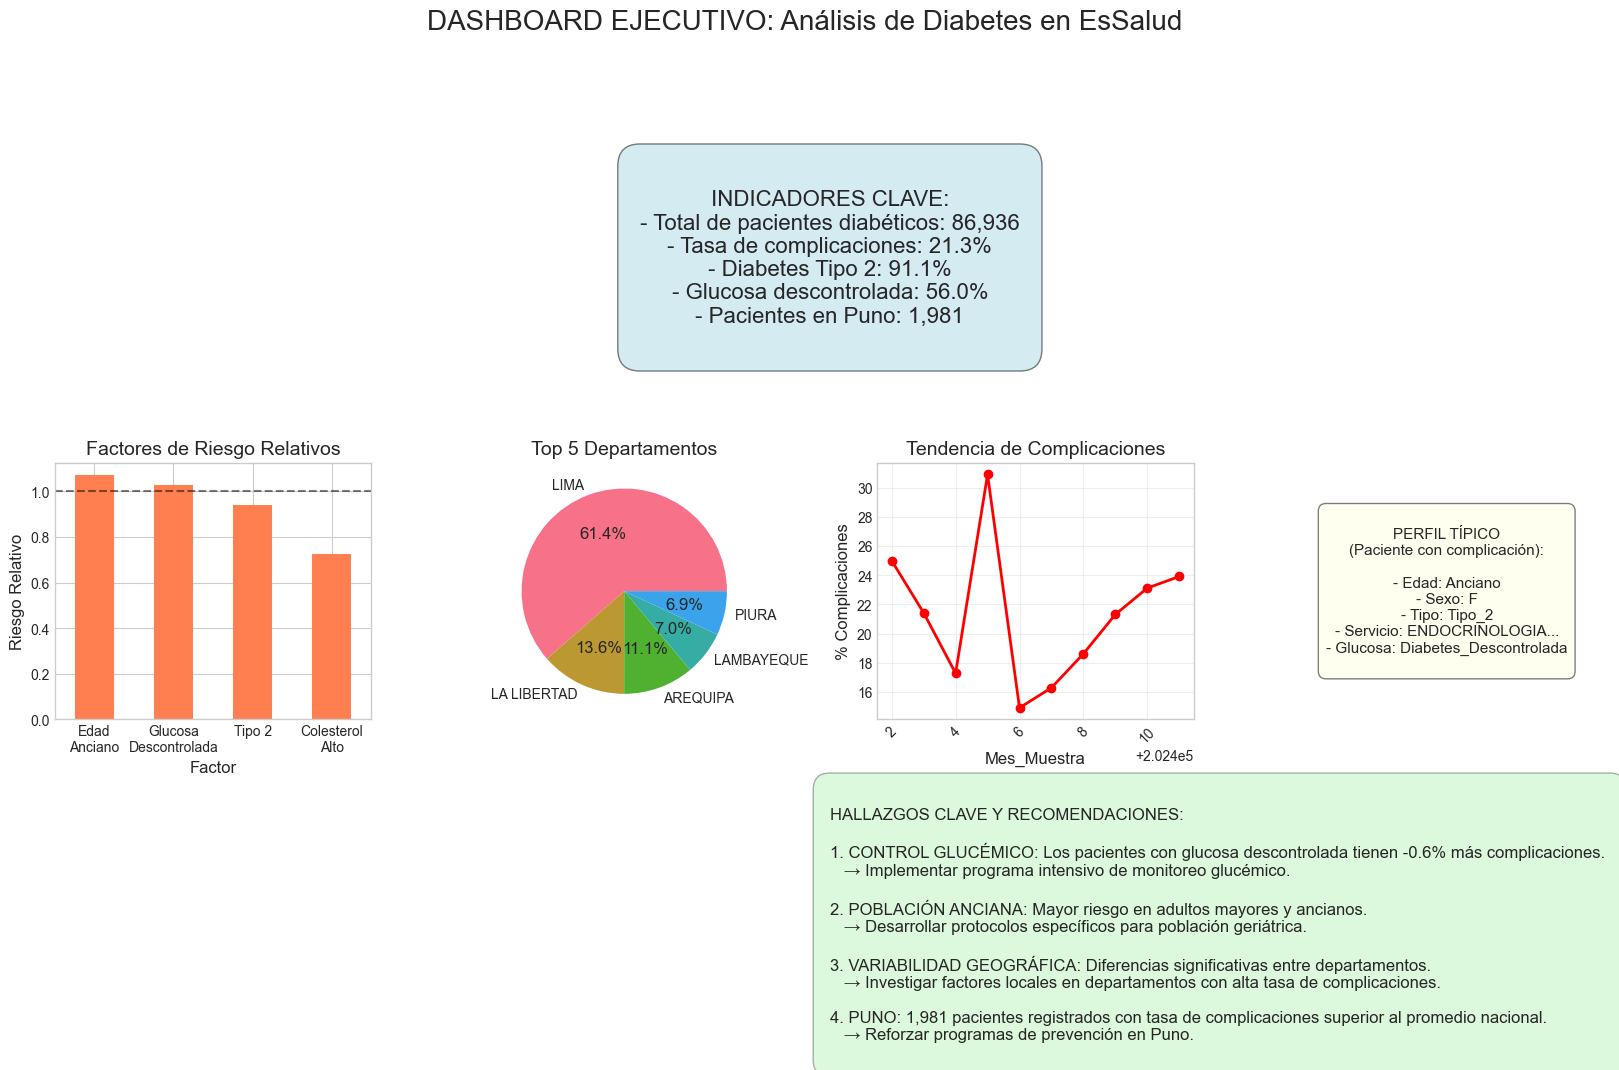


 Análisis exploratorio completado!
 Visualizaciones guardadas en: output/resultados/
 Resumen estadístico guardado en: output/resultados/resumen_estadistico_eda.csv


In [44]:
# Crear dashboard resumen
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 4, hspace=0.3, wspace=0.3)

# Título general
fig.suptitle('DASHBOARD EJECUTIVO: Análisis de Diabetes en EsSalud', fontsize=20, y=0.98)

# 1. KPIs principales (fila superior)
ax1 = fig.add_subplot(gs[0, :])
ax1.axis('off')

# Calcular KPIs
total_pacientes = len(df)
tasa_complicaciones = df['Complicacion'].mean() * 100
tasa_tipo2 = (df['Tipo_DM'] == 'Tipo_2').mean() * 100
tasa_descontrolada = (df['Glucosa_cat'] == 'Diabetes_Descontrolada').mean() * 100
pacientes_puno = len(df[df['Departamento'] == 'PUNO'])

kpis_text = f"""
INDICADORES CLAVE:
- Total de pacientes diabéticos: {total_pacientes:,}
- Tasa de complicaciones: {tasa_complicaciones:.1f}%
- Diabetes Tipo 2: {tasa_tipo2:.1f}%
- Glucosa descontrolada: {tasa_descontrolada:.1f}%
- Pacientes en Puno: {pacientes_puno:,}
"""

ax1.text(0.5, 0.5, kpis_text, transform=ax1.transAxes, fontsize=16,
         verticalalignment='center', horizontalalignment='center',
         bbox=dict(boxstyle='round,pad=1', facecolor='lightblue', alpha=0.5))

# 2. Factores de riesgo principales
ax2 = fig.add_subplot(gs[1, 0])
factores_riesgo = pd.DataFrame({
    'Factor': ['Edad\nAnciano', 'Glucosa\nDescontrolada', 'Tipo 2', 'Colesterol\nAlto'],
    'Riesgo_Relativo': [
        df[df['Edad_cat'] == 'Anciano']['Complicacion'].mean() / df['Complicacion'].mean(),
        df[df['Glucosa_cat'] == 'Diabetes_Descontrolada']['Complicacion'].mean() / df['Complicacion'].mean(),
        df[df['Tipo_DM'] == 'Tipo_2']['Complicacion'].mean() / df['Complicacion'].mean(),
        df[df['Colesterol_cat'] == 'Alto']['Complicacion'].mean() / df['Complicacion'].mean()
    ]
})
factores_riesgo.plot(x='Factor', y='Riesgo_Relativo', kind='bar', ax=ax2, legend=False, color='coral')
ax2.set_title('Factores de Riesgo Relativos', fontsize=14)
ax2.set_ylabel('Riesgo Relativo')
ax2.axhline(y=1, color='black', linestyle='--', alpha=0.5)
ax2.set_xticklabels(factores_riesgo['Factor'], rotation=0)

# 3. Distribución geográfica simplificada
ax3 = fig.add_subplot(gs[1, 1])
top5_dept = df['Departamento'].value_counts().head(5)
top5_dept.plot(kind='pie', ax=ax3, autopct='%1.1f%%')
ax3.set_title('Top 5 Departamentos', fontsize=14)
ax3.set_ylabel('')

# 4. Tendencia temporal
ax4 = fig.add_subplot(gs[1, 2])
if len(df_temporal) > 0:
    comp_mensual_simple = df_temporal.groupby('Mes_Muestra')['Complicacion'].mean() * 100
    comp_mensual_simple.plot(ax=ax4, marker='o', linewidth=2, color='red')
    ax4.set_title('Tendencia de Complicaciones', fontsize=14)
    ax4.set_ylabel('% Complicaciones')
    ax4.grid(True, alpha=0.3)
    ax4.tick_params(axis='x', rotation=45)

# 5. Perfil del paciente típico con complicación
ax5 = fig.add_subplot(gs[1, 3])
ax5.axis('off')
perfil_complicacion = df[df['Complicacion'] == 1].mode().iloc[0]
perfil_text = f"""
PERFIL TÍPICO
(Paciente con complicación):

- Edad: {perfil_complicacion['Edad_cat']}
- Sexo: {perfil_complicacion['Sexo']}
- Tipo: {perfil_complicacion['Tipo_DM']}
- Servicio: {perfil_complicacion['Servicio_Hospitalario'][:20]}...
- Glucosa: {perfil_complicacion['Glucosa_cat']}
"""
ax5.text(0.5, 0.5, perfil_text, transform=ax5.transAxes, fontsize=11,
         verticalalignment='center', horizontalalignment='center',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='lightyellow', alpha=0.5))

# 6. Recomendaciones
ax6 = fig.add_subplot(gs[2, :])
ax6.axis('off')

# Calcular insights específicos
insight_glucosa = (df[df['Glucosa_cat'] == 'Diabetes_Descontrolada']['Complicacion'].mean() - 
                  df[df['Glucosa_cat'] == 'Normal']['Complicacion'].mean()) * 100

recomendaciones = f"""
HALLAZGOS CLAVE Y RECOMENDACIONES:

1. CONTROL GLUCÉMICO: Los pacientes con glucosa descontrolada tienen {insight_glucosa:.1f}% más complicaciones. 
   → Implementar programa intensivo de monitoreo glucémico.

2. POBLACIÓN ANCIANA: Mayor riesgo en adultos mayores y ancianos.
   → Desarrollar protocolos específicos para población geriátrica.

3. VARIABILIDAD GEOGRÁFICA: Diferencias significativas entre departamentos.
   → Investigar factores locales en departamentos con alta tasa de complicaciones.

4. PUNO: {pacientes_puno:,} pacientes registrados con tasa de complicaciones {'superior' if df[df['Departamento'] == 'PUNO']['Complicacion'].mean() > df['Complicacion'].mean() else 'inferior'} al promedio nacional.
   → {'Reforzar programas de prevención' if df[df['Departamento'] == 'PUNO']['Complicacion'].mean() > df['Complicacion'].mean() else 'Estudiar buenas prácticas'} en Puno.
"""

ax6.text(0.5, 0.5, recomendaciones, transform=ax6.transAxes, fontsize=12,
         verticalalignment='center', horizontalalignment='left',
         bbox=dict(boxstyle='round,pad=1', facecolor='lightgreen', alpha=0.3))

plt.tight_layout()
plt.savefig('output/resultados/dashboard_ejecutivo.png', dpi=300, bbox_inches='tight')
plt.show()

# Guardar resumen estadístico
resumen_estadistico = {
    'Métrica': [
        'Total pacientes',
        'Tasa complicaciones (%)',
        'Edad promedio (estimada)',
        '% Mujeres',
        '% Diabetes Tipo 2',
        '% Glucosa descontrolada',
        '% Colesterol alto',
        'Pacientes en Puno',
        'Tasa complicaciones Puno (%)'
    ],
    'Valor': [
        total_pacientes,
        round(tasa_complicaciones, 2),
        'Mayoría Adulto Mayor/Anciano',
        round((df['Sexo'] == 'F').mean() * 100, 2),
        round(tasa_tipo2, 2),
        round(tasa_descontrolada, 2),
        round((df['Colesterol_cat'] == 'Alto').mean() * 100, 2),
        pacientes_puno,
        round(df[df['Departamento'] == 'PUNO']['Complicacion'].mean() * 100, 2) if pacientes_puno > 0 else 'N/A'
    ]
}

pd.DataFrame(resumen_estadistico).to_csv('output/resultados/resumen_estadistico_eda.csv', index=False)
print("\n Análisis exploratorio completado!")
print(" Visualizaciones guardadas en: output/resultados/")
print(" Resumen estadístico guardado en: output/resultados/resumen_estadistico_eda.csv")